In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2


TensorFlow 1.x selected.
1.15.2


Using TensorFlow backend.


In [ ]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


In [26]:
print("Sample Training Data is {}".format(x_train[0]))

Sample Training Data is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("Sample Training label is {}".format(y_train[0:5]))

Sample Training label is [5 0 4 1 9]


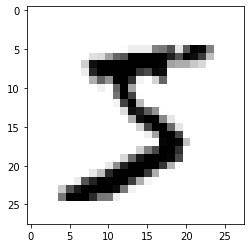

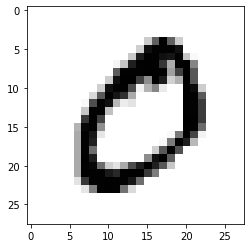

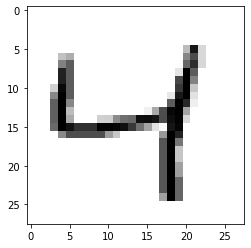

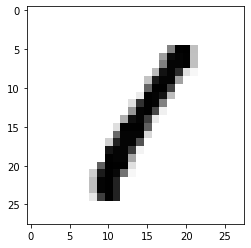

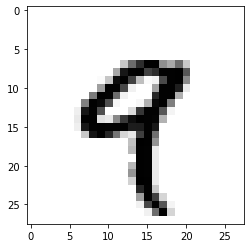

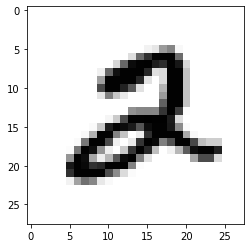

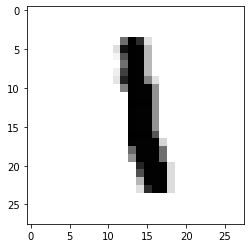

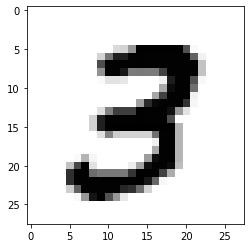

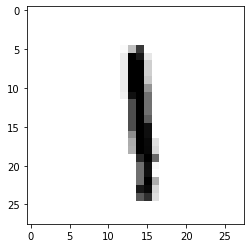

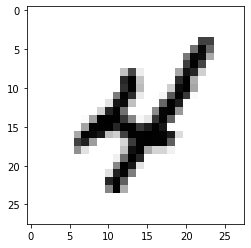

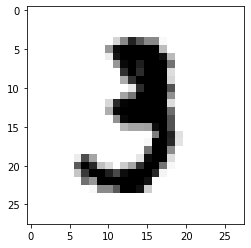

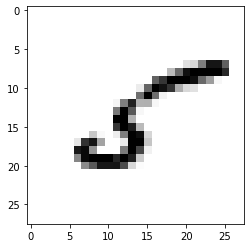

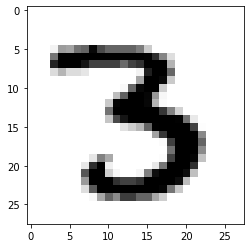

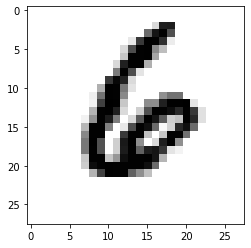

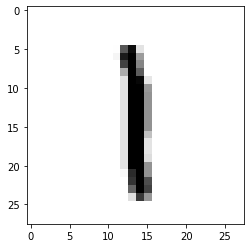

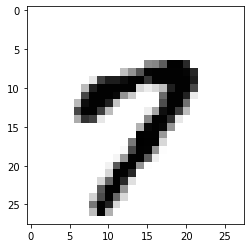

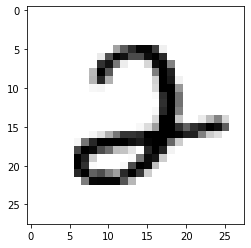

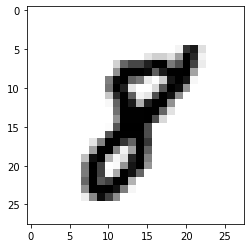

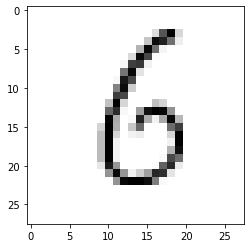

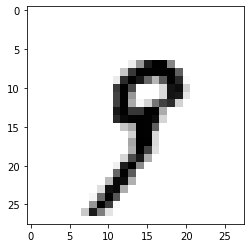

In [ ]:
for i in range(0,20):
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.show()

In [ ]:
#Normalizacion
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [ ]:
print("Training Data after normalizing is {}".format(x_train[0]))
print("Testing  Data after normalizing is {}".format(x_test[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [ ]:
#Configuracion y entrenamiento de la red
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 5 )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2617 - acc: 0.9243
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1064 - acc: 0.9671
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0724 - acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0533 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0399 - acc: 0.9870


In [ ]:
predictions = model.predict(x_test)

In [ ]:
print("Probability distribution for a multi-class classification")
predictions[0]

Probability distribution for a multi-class classification


array([1.8099879e-11, 5.3048471e-10, 4.1038014e-08, 4.7330582e-07,
       1.0849571e-11, 6.6546921e-11, 1.5758548e-17, 9.9999917e-01,
       1.9788076e-11, 4.0574554e-07], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))

7


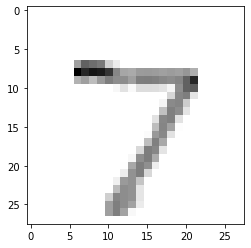

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0856 - acc: 0.9756
0.08564045325284823 0.9756


In [ ]:
#Para que se guarde una imagen a través de captura de pantalla
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


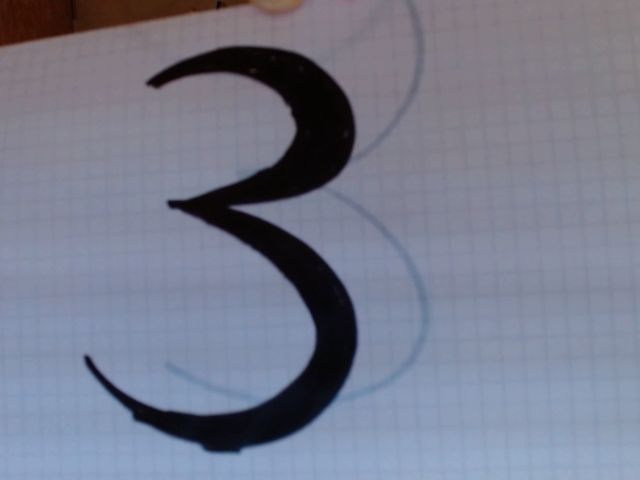

In [ ]:
#Llamada y procesamiento de la captura de pantalla del número
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


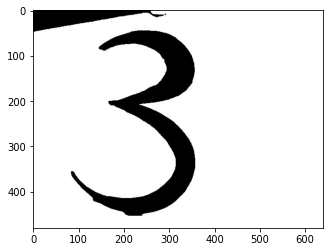

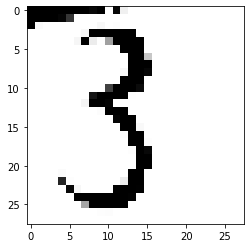

Training Data Shape is (28, 28)


In [ ]:
#Formato y normalizacion de la imagen recién guardada
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
print("Training Data Shape is {}".format(new_array.shape))

user_test = tf.keras.utils.normalize(new_array, axis = 1)

In [ ]:
#Prediccion del valor equivalente a la imagen.
predecido = model.predict([[user_test]])
#predicted = model.predict(user_test)
a = predecido[0][0]
for i in range(0,10):
  b = predecido[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predecido[0]))

Probability Distribution for 0 3.666886e-08
Probability Distribution for 1 0.0016810364
Probability Distribution for 2 6.7751803e-06
Probability Distribution for 3 0.99820673
Probability Distribution for 4 6.896336e-11
Probability Distribution for 5 4.0030636e-06
Probability Distribution for 6 2.0672108e-11
Probability Distribution for 7 5.2531357e-07
Probability Distribution for 8 1.0014901e-05
Probability Distribution for 9 9.091315e-05
The Predicted Value is 3
